<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/intro-Machine-Learning/blob/main/examples_bank/5_regression/regresion_propinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Modelo de regresión para predecir el valor pagado de propina

## [Video de apoyo](https://www.youtube.com/watch?v=1dXCFmC_cHM)

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('tips.csv')
df.head() 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.keys()

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [5]:
p = df[['total_bill', 'sex', 'day', 'time', 'tip']]

In [6]:
p.head() 

,total_bill,sex,day,time,tip
0,16.99,Female,Sun,Dinner,1.01
1,10.34,Male,Sun,Dinner,1.66
2,21.01,Male,Sun,Dinner,3.50
3,23.68,Male,Sun,Dinner,3.31
4,24.59,Female,Sun,Dinner,3.61


# Dividir en atributos predictores y etiquetas 

In [7]:
p_atributos = p.drop('tip', axis = 1)
p_labels = p.tip

# Metodología de constitución de un modelo de regresión en aprendizaje supervisado

## 1. Plantear bien la pregunta.  

* ¿Regresión o clasificación?

Es una tarea de regresión porque lo que se trata de predecir es valores no clases. 

2. Exploración inicial.

* Hacer explícita la función objetivo.
* Decir cuáles son los atributos (descripción breve de cada uno)

• Practicar una exploración tabular y gráfica de los datos.

In [9]:
p.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   sex         244 non-null    object 
 2   day         244 non-null    object 
 3   time        244 non-null    object 
 4   tip         244 non-null    float64
dtypes: float64(2), object(3)
memory usage: 9.7+ KB


In [10]:
p.sex.value_counts() 

Male      157
Female     87
Name: sex, dtype: int64

In [11]:
p.day.value_counts() # Aplicaremos codificación OneHotEncoder para el atributo día

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [12]:
p.time.value_counts() 

Dinner    176
Lunch      68
Name: time, dtype: int64

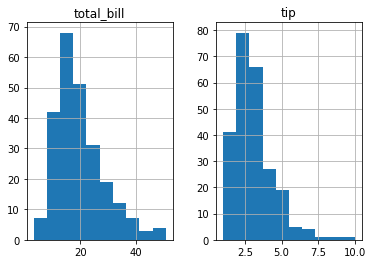

In [14]:
p.hist() 
plt.show()

3. Preparar los datos para los algoritmos de aprendizaje.
* Hacer separación inicial de datos para entrenar y para testear.

In [15]:
from sklearn.model_selection import train_test_split 
p_train_atributos,p_test_atributos,p_train_labels, p_test_labels = train_test_split(\
                                                      p_atributos,\
                                                      p_labels, \
                                                      test_size = 0.2,\
                                                      random_state = 42) 

* Explorar correlaciones lineales con la variable objetivo.

In [16]:
p.corr().tip.sort_values(ascending = False) 

tip           1.000000
total_bill    0.675734
Name: tip, dtype: float64

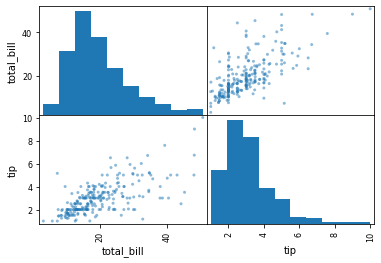

In [49]:
from pandas.plotting import scatter_matrix 
scatter_matrix(p[['total_bill', 'tip']])
plt.savefig('correlacion_positiva.jpg')
plt.show() 

# Codificación de variables categóricas 

In [19]:
from sklearn.compose import ColumnTransformer 

In [20]:
lista_atributos_binarios = ['sex', 'time'] 
lista_atributos_multi_clase = ['day'] 

In [21]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

In [22]:
procesador = ColumnTransformer([
    ('num', StandardScaler(), ['total_bill']),
    ('bi',OrdinalEncoder(),lista_atributos_binarios),
    ('multi',OneHotEncoder(), lista_atributos_multi_clase)
])

In [23]:
X_train_preparados = procesador.fit_transform(p_train_atributos)
X_test_preparados = procesador.transform(p_test_atributos)

In [24]:
X_train_preparados.shape

(195, 7)

## 4. Entrenamiento y selección de modelo.  

* Instanciar varios modelos y entrenarlos sobre datos de entrenamiento preparados.
* Medir el desempeño de varios modelos (comparativa, con la técnica de la validación cruzada)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 

In [26]:
r_lineal = LinearRegression() 
r_tree = DecisionTreeRegressor()
r_forest = RandomForestRegressor() 

In [27]:
r_lineal.fit(X_train_preparados, p_train_labels)
r_tree.fit(X_train_preparados, p_train_labels)
r_forest.fit(X_train_preparados, p_train_labels)

RandomForestRegressor()

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
score_lineal = np.sqrt(-cross_val_score(r_lineal, X_train_preparados, p_train_labels, cv = 10,\
                              scoring = 'neg_mean_squared_error'))
score_tree = np.sqrt(-cross_val_score(r_tree, X_train_preparados, p_train_labels, cv = 10,\
                             scoring = 'neg_mean_squared_error' ))
score_forest = np.sqrt(-cross_val_score(r_forest, X_train_preparados, p_train_labels, cv = 10,\
                               scoring = 'neg_mean_squared_error'))

In [30]:
score_lineal.mean()

1.0957614663162485

In [31]:
score_tree.mean()

1.452768979428145

In [32]:
score_forest.mean() 

1.2008698405390574

## 5. Afinar el modelo.  

* Crear cuadrícula (de búsqueda) de hiperparámetros.
* Seleccionar la combinación de hiperparámetros que consigue el mejor puntaje. (El mejor modelo).

In [34]:
grid_param_lr = {
    'fit_intercept':[True, False], 
    'normalize':[True, False],
    'copy_X':[True, False],
    'positive':[True, False]
}

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
grid_search = GridSearchCV(r_lineal, grid_param_lr, cv = 10, \
                           scoring = 'neg_mean_squared_error',\
                          return_train_score = True)

In [37]:
grid_search.fit(X_train_preparados, p_train_labels)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'positive': [True, False]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [38]:
grid_search.best_params_


{'copy_X': True, 'fit_intercept': False, 'normalize': True, 'positive': True}

In [39]:
mejor_modelo = grid_search.best_estimator_

In [40]:
np.sqrt(-cross_val_score(mejor_modelo, X_train_preparados, p_train_labels, cv = 10, \
                        scoring = 'neg_mean_squared_error')).mean() 

1.09437378103845

## 6. Presentar la solución.  

* Mostrar el desempeño sobre los datos para testear.

In [41]:
X_test_prep = procesador.transform(p_test_atributos)

In [42]:
from sklearn.metrics import mean_squared_error 

In [44]:
p_test_predicciones = mejor_modelo.predict(X_test_prep)

In [45]:
np.sqrt(mean_squared_error(p_test_labels, p_test_predicciones))

0.776813964146169

In [46]:
p_atributos.iloc[0,:].values

array([16.99, 'Female', 'Sun', 'Dinner'], dtype=object)

In [47]:
mejor_modelo.predict([X_train_preparados[2]]),p_train_labels[2]

(array([3.791583]), 3.5)

In [48]:
mejor_modelo.predict([X_test_preparados[4]]),p_test_labels.iloc[4]

(array([2.34164434]), 2.0)

## Referencias  

* dataset de las propinas: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv  

* la clase LinearRegression de Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

* La clase GridSearchCV de sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html